<a href="https://colab.research.google.com/github/krishnamanchikalapudi/examples.py/blob/develop/MiniProjects/Stock_with_Mean_%26_STD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
Stock price plot with Mean and Standard Deviation

# Import libraries

In [1]:
import sys, platform, os, ssl
# below command to install libraries in Jupyter Notebook
# !{sys.executable} -m pip install -U -q numpy pandas matplotlib seaborn scikit-learn keras seaborn yfinance
!{sys.executable} -m pip install -U -q yfinance

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

print ("Python ver :--------> ", platform.python_version() )
print ("numpy ver :---------> ", np.__version__)
print ("pandas ver :--------> ", pd.__version__)
print ("matplotlib ver :----> ", mpl.__version__)
print ("seaborn ver :-------> ", sns.__version__)
print ("yfinance ver :------> ", yf.__version__)

Python ver :-------->  3.6.9
numpy ver :--------->  1.19.4
pandas ver :-------->  1.1.5
matplotlib ver :---->  3.2.2
seaborn ver :------->  0.11.0
yfinance ver :------>  0.1.54


# stock query

In [2]:
# fix Python SSL CERTIFICATE_VERIFY_FAILED
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context


symbol = "FRC"
stock = yf.Ticker(symbol)
info = stock.info
info

{'52WeekChange': 0.19732463,
 'SandP52WeekChange': 0.14955807,
 'address1': '111 Pine Street',
 'address2': '2nd Floor',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 142.83,
 'askSize': 900,
 'averageDailyVolume10Day': 910260,
 'averageVolume': 900793,
 'averageVolume10days': 910260,
 'beta': 1.048818,
 'beta3Year': None,
 'bid': 142.73,
 'bidSize': 800,
 'bookValue': 56.332,
 'category': None,
 'circulatingSupply': None,
 'city': 'San Francisco',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'dateShortInterest': 1607990400,
 'dayHigh': 143.23,
 'dayLow': 140.7363,
 'dividendRate': 0.8,
 'dividendYield': 0.0057,
 'earningsQuarterlyGrowth': 0.248,
 'enterpriseToEbitda': None,
 'enterpriseToRevenue': 10.72,
 'enterpriseValue': 38403444736,
 'exDividendDate': 1603843200,
 'exchange': 'NYQ',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EST',
 'expireDate': None,
 'fax': '415-392-14

In [3]:
dataset = stock.history(period="max")
dataset.sort_values('Date')
dataset

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-12-09,21.173915,21.842156,20.971888,21.694521,10609700,0.0,0
2010-12-10,21.290459,21.539106,21.026271,21.298229,1206800,0.0,0
2010-12-13,21.368169,21.539114,20.979657,21.290466,473200,0.0,0
2010-12-14,21.523566,21.733361,20.995190,21.220526,358200,0.0,0
2010-12-15,21.135055,21.523567,21.127285,21.329311,242200,0.0,0
...,...,...,...,...,...,...,...
2020-12-21,135.869995,136.639999,133.070007,135.750000,972300,0.0,0
2020-12-22,136.220001,137.850006,135.570007,136.649994,854700,0.0,0
2020-12-23,137.589996,140.559998,137.220001,140.460007,625900,0.0,0


## Todays stock price

In [4]:
dataset.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-12-09,21.173915,21.842156,20.971888,21.694521,10609700,0.0,0
2010-12-10,21.290459,21.539106,21.026271,21.298229,1206800,0.0,0
2010-12-13,21.368169,21.539114,20.979657,21.290466,473200,0.0,0
2010-12-14,21.523566,21.733361,20.995190,21.220526,358200,0.0,0
2010-12-15,21.135055,21.523567,21.127285,21.329311,242200,0.0,0


In [5]:
from datetime import datetime
# a = datetime.strptime("2020-12-24", "%Y-%m-%d")  # 1608768000
a = datetime.strptime("2010-12-09", "%Y-%m-%d") # 1291852800
b = datetime(1970, 1, 1)
(a-b).total_seconds()  

1291852800.0

## Arithmetic info

In [6]:
datasetLen = len(dataset)
stockDays = 251 # np.int(datasetLen / 5 )

dataset['Date'] = dataset.index.astype(str)
dataset['Timestamp'] = np.floor_divide(dataset.index.astype(int), 1000000000)

print ("dataset:: shape: {};  length: {}; ".format(dataset.shape, datasetLen) )
# mean = (sum of numbers) % (number of observations)
dataset['Mean100Days'] = dataset.Close.rolling(window=100).mean()
dataset['Std100Days'] = dataset.Close.rolling(window=100).std()
dataset['Mean365Days'] = dataset.Close.rolling(window=365).mean()
dataset['Std365Days'] = dataset.Close.rolling(window=365).std()
dataset['Mean3Years'] = dataset.Close.rolling(window=(stockDays * 3)).mean()
dataset['Std3Years'] = dataset.Close.rolling(window=(stockDays * 3)).std()
dataset['Mean5Years'] = dataset.Close.rolling(window=(stockDays * 5)).mean()
dataset['Std5Years'] = dataset.Close.rolling(window=(stockDays * 5)).std()
dataset['Mean10Years'] = dataset.Close.rolling(window=(stockDays * 10)).mean()
dataset['Std10Years'] = dataset.Close.rolling(window=(stockDays * 10)).std()

# Median is found by ordering the set from lowest to highest and finding the exact middle
# dataset['CloseMedian'] = dataset.Close.rolling(window=winValue).median()
dataset

dataset:: shape: (2530, 9);  length: 2530; 


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,Timestamp,Mean100Days,Std100Days,Mean365Days,Std365Days,Mean3Years,Std3Years,Mean5Years,Std5Years,Mean10Years,Std10Years
Date,,,,,,,,,,,,,,,,,,,
2010-12-09,21.173915,21.842156,20.971888,21.694521,10609700,0.0,0,2010-12-09,1291852800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-10,21.290459,21.539106,21.026271,21.298229,1206800,0.0,0,2010-12-10,1291939200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-13,21.368169,21.539114,20.979657,21.290466,473200,0.0,0,2010-12-13,1292198400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-14,21.523566,21.733361,20.995190,21.220526,358200,0.0,0,2010-12-14,1292284800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-15,21.135055,21.523567,21.127285,21.329311,242200,0.0,0,2010-12-15,1292371200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-21,135.869995,136.639999,133.070007,135.750000,972300,0.0,0,2020-12-21,1608508800,121.295843,9.969984,107.873027,13.032251,101.310338,11.781508,90.500812,19.505296,62.293547,32.216050
2020-12-22,136.220001,137.850006,135.570007,136.649994,854700,0.0,0,2020-12-22,1608595200,121.539332,10.045137,107.979980,13.107780,101.379008,11.836540,90.566464,19.521861,62.339018,32.240423
2020-12-23,137.589996,140.559998,137.220001,140.460007,625900,0.0,0,2020-12-23,1608681600,121.816328,10.181595,108.109380,13.194603,101.453010,11.906338,90.635745,19.544527,62.386146,32.268125


In [7]:
datesetNoIndex = dataset.reset_index(drop=True, inplace=False)
datesetNoIndex

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,Timestamp,Mean100Days,Std100Days,Mean365Days,Std365Days,Mean3Years,Std3Years,Mean5Years,Std5Years,Mean10Years,Std10Years
0,21.173915,21.842156,20.971888,21.694521,10609700,0.0,0,2010-12-09,1291852800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21.290459,21.539106,21.026271,21.298229,1206800,0.0,0,2010-12-10,1291939200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.368169,21.539114,20.979657,21.290466,473200,0.0,0,2010-12-13,1292198400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21.523566,21.733361,20.995190,21.220526,358200,0.0,0,2010-12-14,1292284800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21.135055,21.523567,21.127285,21.329311,242200,0.0,0,2010-12-15,1292371200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,135.869995,136.639999,133.070007,135.750000,972300,0.0,0,2020-12-21,1608508800,121.295843,9.969984,107.873027,13.032251,101.310338,11.781508,90.500812,19.505296,62.293547,32.216050
2526,136.220001,137.850006,135.570007,136.649994,854700,0.0,0,2020-12-22,1608595200,121.539332,10.045137,107.979980,13.107780,101.379008,11.836540,90.566464,19.521861,62.339018,32.240423
2527,137.589996,140.559998,137.220001,140.460007,625900,0.0,0,2020-12-23,1608681600,121.816328,10.181595,108.109380,13.194603,101.453010,11.906338,90.635745,19.544527,62.386146,32.268125
2528,140.500000,140.809998,139.130005,140.529999,185700,0.0,0,2020-12-24,1608768000,122.091428,10.312335,108.237535,13.281661,101.526404,11.976544,90.705210,19.566818,62.433339,32.295755


## Matlib Plot graph

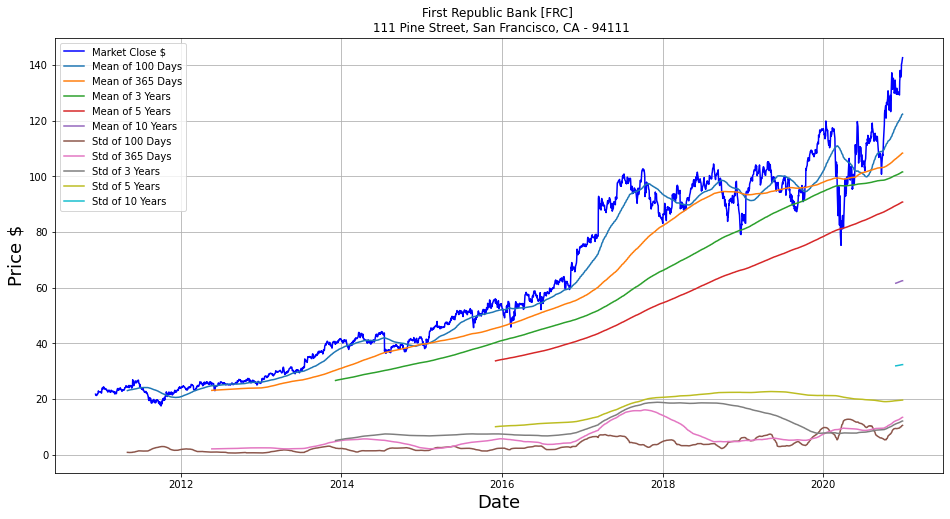

In [8]:
mpl.rcParams['axes.grid'] = True
plt.figure(figsize=(35, 8))
plt.subplot(1,2,1);

plt.plot(dataset.index, dataset.Close, color='blue', label='Market Close $')
# meanLabel = ("Mean of {} days". format(winValue))
plt.plot(dataset.index, dataset.Mean100Days, label='Mean of 100 Days')
plt.plot(dataset.index, dataset.Mean365Days, label='Mean of 365 Days')
plt.plot(dataset.index, dataset.Mean3Years, label='Mean of 3 Years')
plt.plot(dataset.index, dataset.Mean5Years, label='Mean of 5 Years')
plt.plot(dataset.index, dataset.Mean10Years, label='Mean of 10 Years')

plt.plot(dataset.index, dataset.Std100Days, label='Std of 100 Days')
plt.plot(dataset.index, dataset.Std365Days, label='Std of 365 Days')
plt.plot(dataset.index, dataset.Std3Years, label='Std of 3 Years')
plt.plot(dataset.index, dataset.Std5Years, label='Std of 5 Years')
plt.plot(dataset.index, dataset.Std10Years, label='Std of 10 Years')

# plt.plot(dataset.index, dataset.CloseMedian, color='red', label='Median')
plt.title("{} [{}] \n {}, {}, {} - {}".format(info['longName'], info['symbol'], info['address1'], info['city'], info['state'], info['zip']))
plt.xlabel("Date",fontsize=18)
plt.ylabel('Price $',fontsize=18)
plt.legend(loc='best')
plt.show()

## Seaborn graph

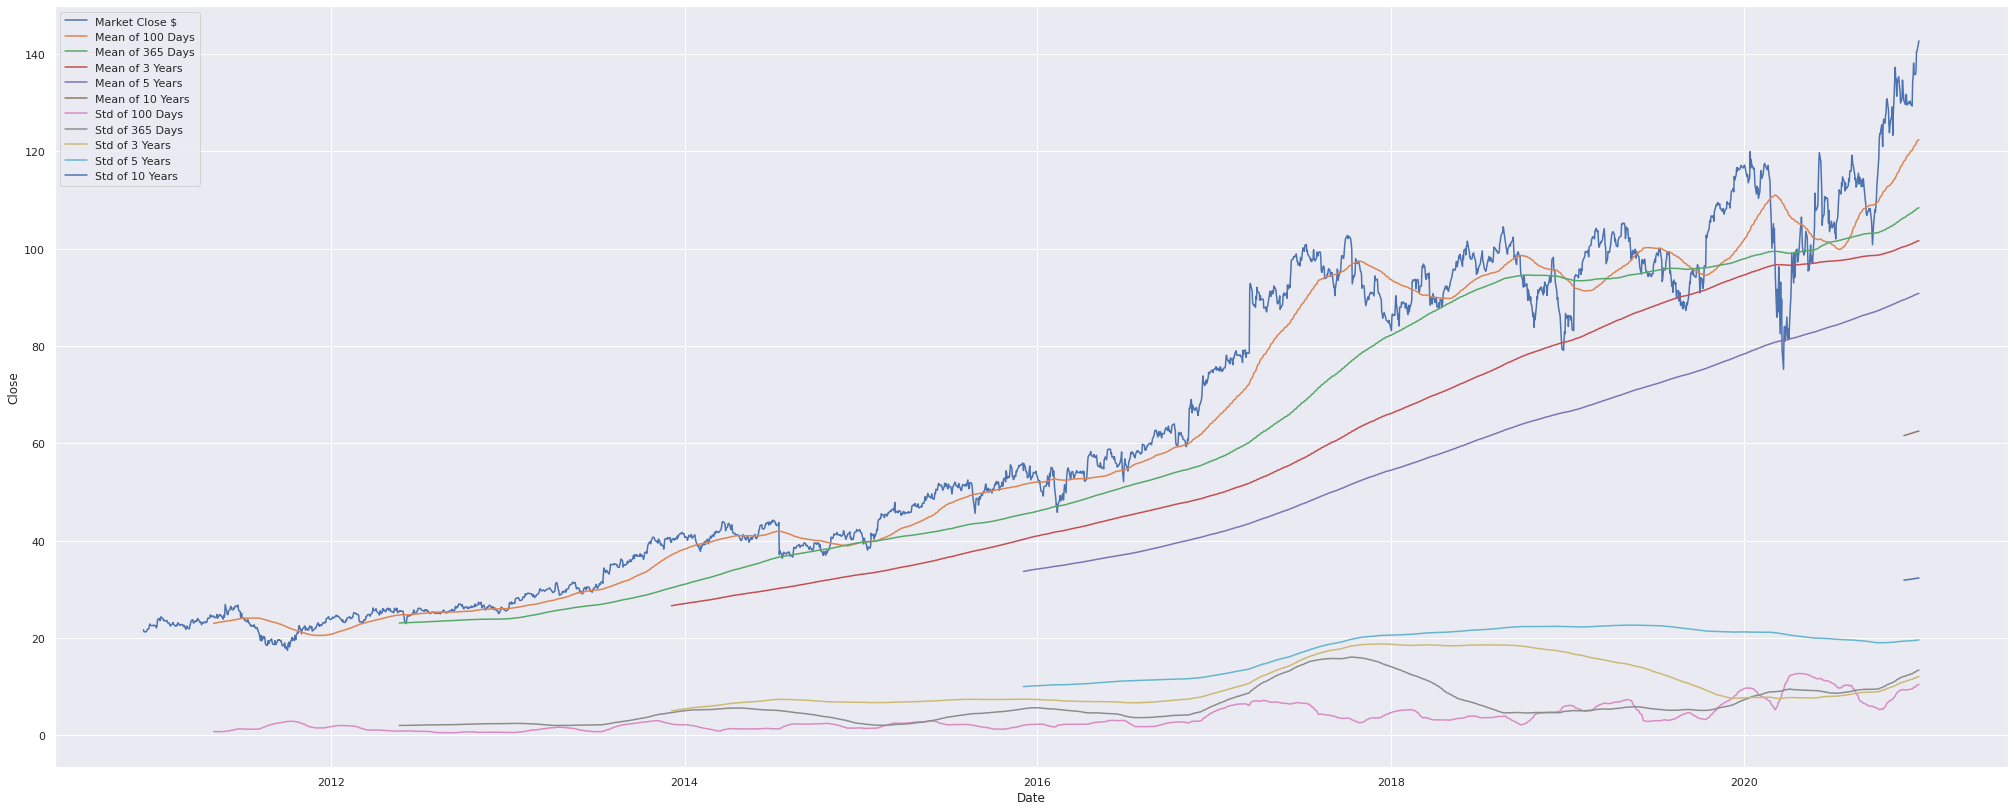

In [25]:
sns.set()
plt.figure(figsize=(35, 14))

# sns.lineplot(.index, dataset., color='blue', )
sns.lineplot(data=dataset, x=dataset.index, y=dataset.Close, label='Market Close $')
sns.lineplot(data=dataset, x=dataset.index, y=dataset.Mean100Days, label='Mean of 100 Days')
sns.lineplot(data=dataset, x=dataset.index, y=dataset.Mean365Days, label='Mean of 365 Days')
sns.lineplot(data=dataset, x=dataset.index, y=dataset.Mean3Years, label='Mean of 3 Years')
sns.lineplot(data=dataset, x=dataset.index, y=dataset.Mean5Years, label='Mean of 5 Years')
sns.lineplot(data=dataset, x=dataset.index, y=dataset.Mean10Years, label='Mean of 10 Years')
sns.lineplot(data=dataset, x=dataset.index, y=dataset.Std100Days, label='Std of 100 Days')
sns.lineplot(data=dataset, x=dataset.index, y=dataset.Std365Days, label='Std of 365 Days')
sns.lineplot(data=dataset, x=dataset.index, y=dataset.Std3Years, label='Std of 3 Years')
sns.lineplot(data=dataset, x=dataset.index, y=dataset.Std5Years, label='Std of 5 Years')
sns.lineplot(data=dataset, x=dataset.index, y=dataset.Std10Years, label='Std of 10 Years')

plt.show()